# Matplotlib

In [2]:
# this is a magic command that says we want our plots to show inline
%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set_theme()

In [3]:
x = np.linspace(0, 2 * np.pi, 50) # Creates an array of values [0, 2pi) with 50 pts in between
y1 = np.sin(x)
y2 = np.cos(x)
yrandom = np.random.normal(size=500) # just 500 pts of random data all mean=0 std=1
yrandom2 = np.random.random(size=50) # 50 points of data [0,1)

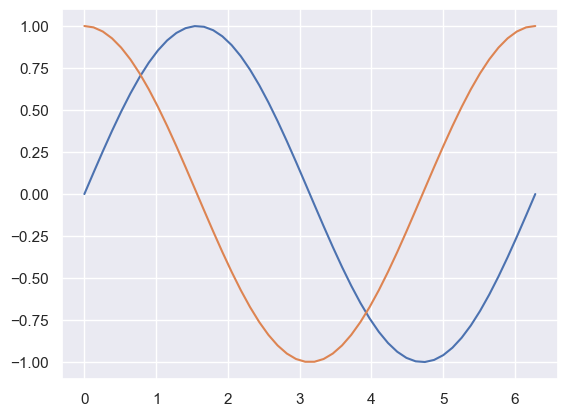

In [7]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

If we want to split a graph into multiple plots we can use the subplot option, this works by defining the numeber (`x`) of subplots across and the number of subplots down (`y`) and then choosing which plot to in order left to right, up to down to `plt.subplot(x, y, n)`. The return is an axes object that has all the same plot functions

In [8]:
plt.subplot?

Signature: plt.subplot(*args, **kwargs) -> 'Axes'
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figu

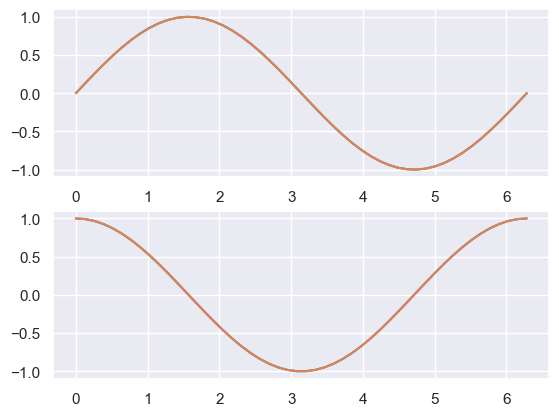

In [10]:
ax1 = plt.subplot(2,1,1)
ax1.plot(x, y1)
ax2 = plt.subplot(2,1,2)
ax2.plot(x, y2)
plt.show()

The above functions automatically create the figure. By explicitly creating it we can then set things like the size of the figure, plot more than one figure per cell, and do other things

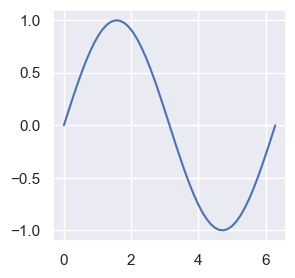

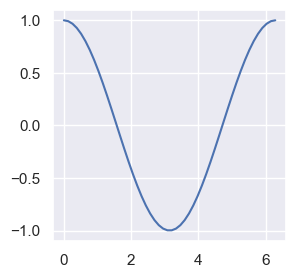

In [14]:
for y in (y1, y2):
    fig = plt.figure(figsize=(3,3)) 
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,y)
    plt.show()

## Histogram
Using `plt.show()` is another way to do multiple graphs per cell. (The semicolon at the end just prevents printing of the value of the plt function which is long and not useful)

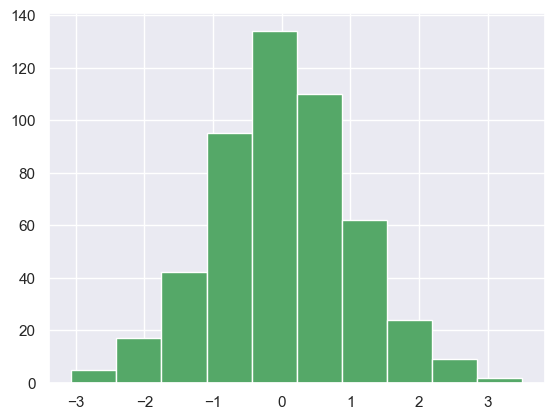

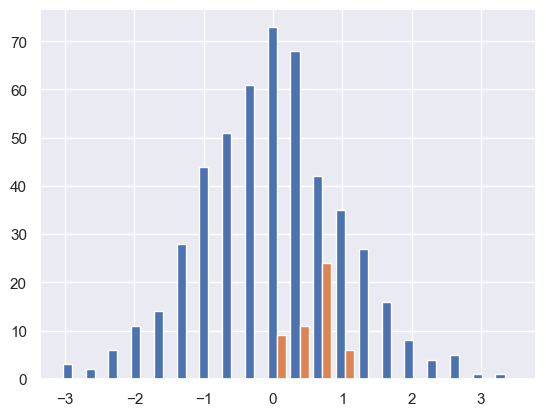

In [47]:
plt.hist(yrandom, bins=10)
plt.show()
plt.hist([yrandom, yrandom2], bins=20);
plt.show()

## Scatter Plot
The `s` argument defines the point size in pixels, the `c` argument is the color, which can be an array of numbers each 0 to 1 which are mapped to a color specturm for visualization. Please read the documentation for more information 

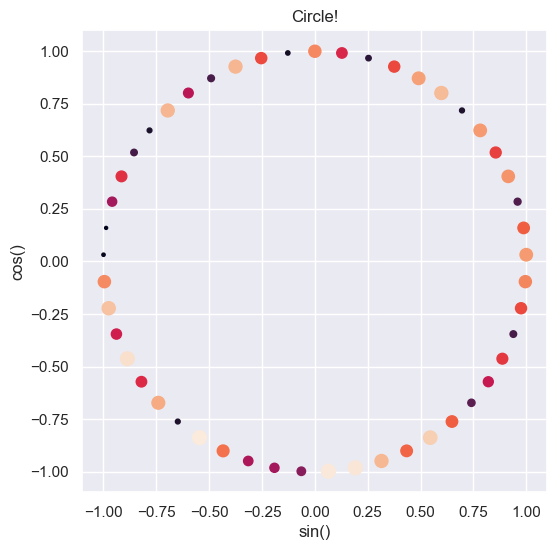

In [53]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(y1, y2, s=yrandom2*100, c=yrandom2)

# set labels and titles
ax.set_xlabel("sin()")
ax.set_ylabel("cos()")
ax.set_title("Circle!")
plt.show()

In [55]:
# scikit-learn has example datasets. 
from sklearn import datasets

In [56]:
# This will load the iris dataset which comes as an object that behaves like a dictionary in that you can access .keys() or using .data/.target/etc
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [70]:
data = iris.data
print(iris.target_names)
print(data[:5]) #Print first 5 elements
print(data[0,:]) # first row 

['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[5.1 3.5 1.4 0.2]


In [62]:
target = iris.target
print(set(target))
print(iris.target_names)

{0, 1, 2}
['setosa' 'versicolor' 'virginica']


['setosa' 'versicolor' 'virginica']


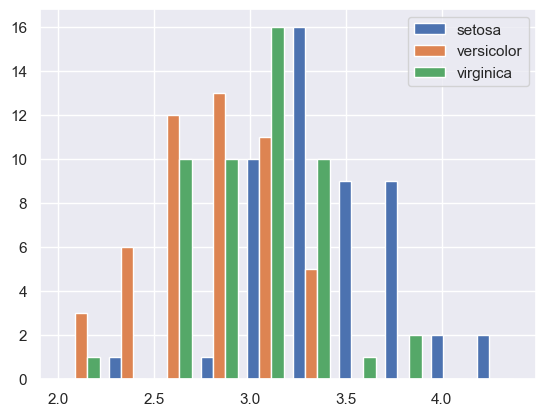

In [78]:
sepal_length = data[:,0] #First column
sepal_width = data[:,1]
petal_length = data[:,2]
petal_width = data[:,3]

tmp = []
for i in {0,1,2}:
    tmp.append(sepal_width[target == i]) # select the data from sepal width s.t. they have the same target value
    # will select all sepal_width where target == i, therefore creatings three ndarrays that seperate the targtes

#print(tmp)
#print(type(tmp[0]))
plt.hist(tmp, label=iris.target_names, bins=10)
plt.legend();
plt.show();

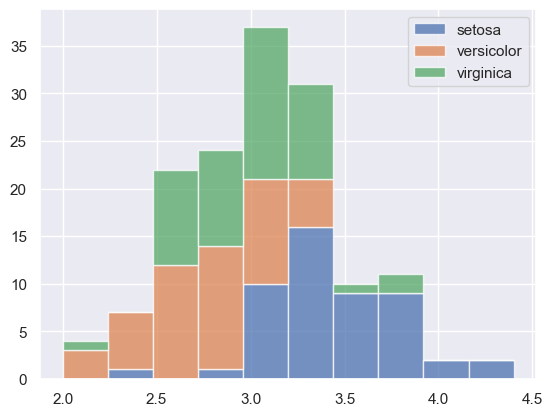

In [79]:
plt.hist(tmp, stacked=True, label=iris.target_names, alpha=0.75, bins=10)
plt.legend();
plt.show()

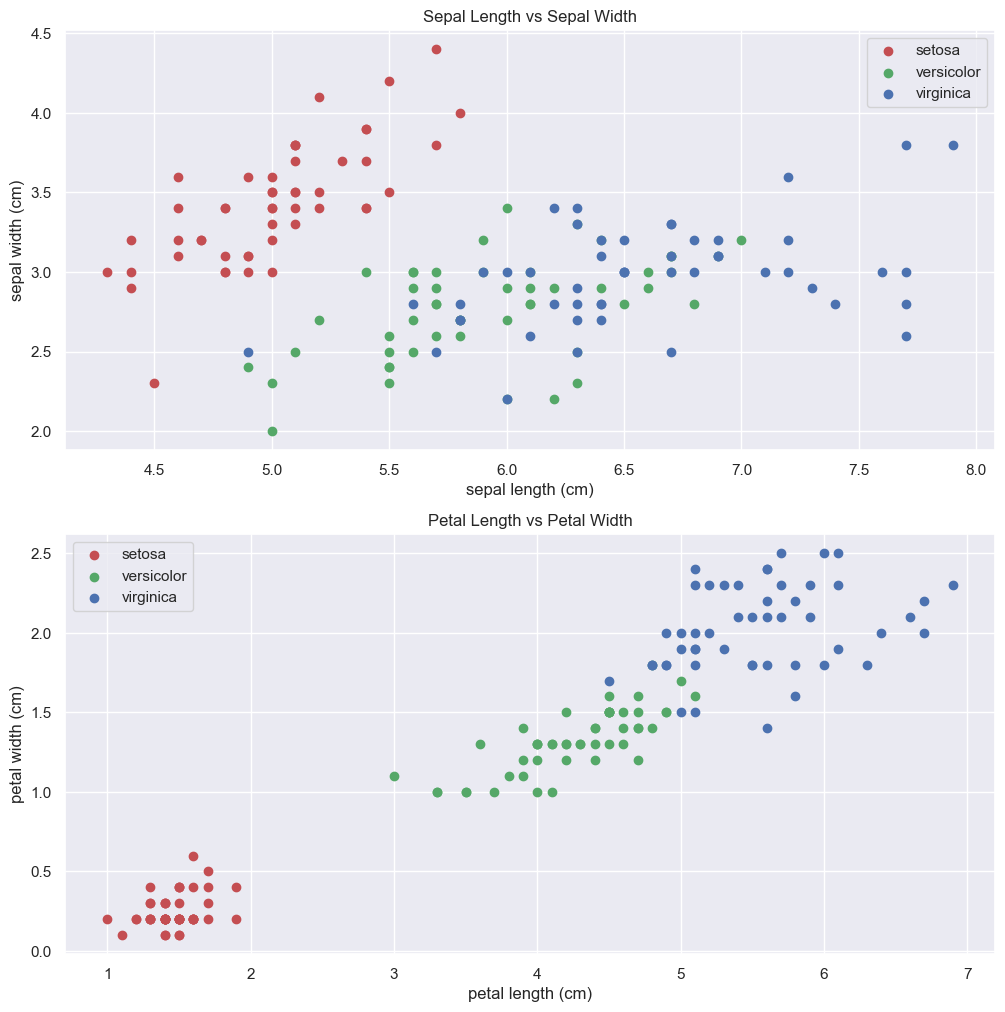

In [85]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
colors = ['r', 'g', 'b'] # this only works because the target values are 0..n-1, could also use a dict
for t in {0,1,2}:
    ax1.scatter(sepal_length[target==t], data[target==t, 1], c=colors[t], label=iris.target_names[t] )
ax1.set_xlabel(iris.feature_names[0])
ax1.set_ylabel(iris.feature_names[1])
ax1.legend();
ax1.set_title('Sepal Length vs Sepal Width')
for t in {0,1,2}:
    ax2.scatter(data[target==t, 2], data[target==t, 3], c=colors[t], label=iris.target_names[t] )
ax2.set_xlabel(iris.feature_names[2])
ax2.set_ylabel(iris.feature_names[3])
ax2.legend();
ax2.set_title('Petal Length vs Petal Width')
plt.show();


What can we see here? Setosa is easy to differentiate based upon sepal width and length from the other two (And also petal length and width). There are algorithms that do basically this.

We can also use custom tick label. Below I'll open a CSV file that has text, read it into two lists, one for dates, the other for the closing prices

In [87]:
import csv
reader = csv.reader(open("AMZN.csv", newline=''))
next(reader) # Skip the first row that has headers
dates = []
prices = []

for row in reader:
    dates += [row[0]]
    prices += [float(row[2])]

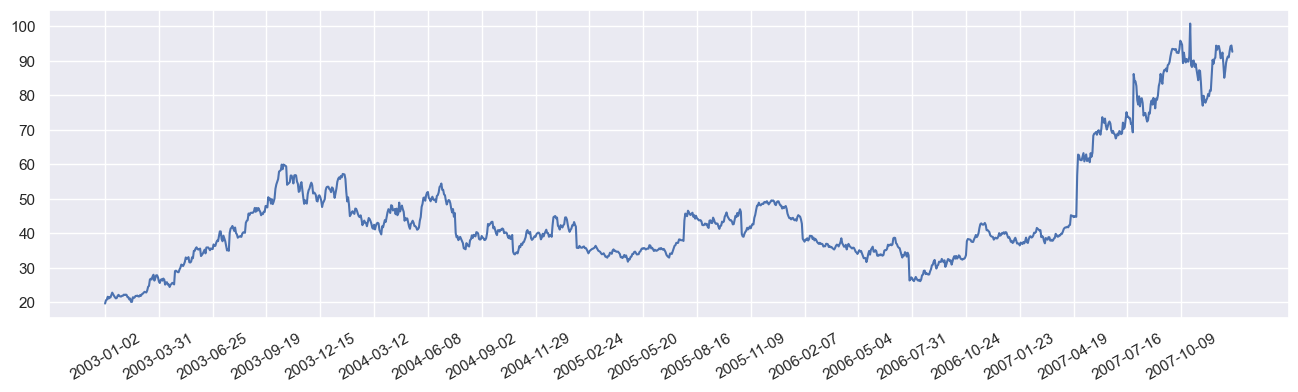

In [90]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(range(len(dates)), prices)
ax.set_xticks(range(len(dates))[::60]) #set's the location of the tickets (every 60)
ax.set_xticklabels(dates[::60], rotation=30); # print a tick at every 60th day
plt.show()